In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [4]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
from tensorflow.keras import layers

In [11]:
def mymodel(input_shape, num_classes):
    inputs= layers.Input(shape=input_shape)

    #cnn의 역할: feature extraction, feature map을 만들어주는 역할 
    net = layers.Conv2D(32,3,1,padding='SAME')(inputs)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(32,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net) #2D->1D
    net = layers.Dense(512)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)
#     net = layers.Dense(128)(net)
#     net = layers.Activation('relu')(net)
    net = layers.Dense(num_classes)(net)
    net = layers.Activation('softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs= net, name='test')
    return model

In [12]:
input_shape=(28,28,1)
num_classes=10

In [15]:
model=mymodel(input_shape, num_classes)

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
train_x_4d=train_x[...,tf.newaxis]/255

In [18]:
num_epoch = 1
batch_size= 64
hist = model.fit(train_x_4d, train_y, batch_size= batch_size, shuffle=True, epochs=num_epoch)

1875/1875 [==============================] - 291s 155ms/step - loss: 0.4147 - accuracy: 0.8480


In [19]:
test_x_4d=test_x[...,tf.newaxis]/255
model.evaluate(test_x_4d, test_y)

313/313 [==============================] - 9s 29ms/step - loss: 0.3052 - accuracy: 0.8918


[0.30522477626800537, 0.8917999863624573]

In [20]:
print(test_y[0:10])

[9 2 1 1 6 1 4 6 5 7]


In [21]:
test_x10= test_x[0:10]/255

In [22]:
test_x10= test_x10[...,tf.newaxis]

In [24]:
pred = model.predict(test_x10)

In [26]:
np.argmax(pred, axis=1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

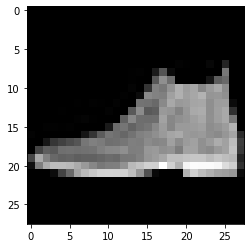

In [27]:
plt.imshow(test_x[0],'gray')
plt.show()

### 디렉토리에서 불러오기

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets
from tensorflow.keras import layers

In [29]:
def mymodel(input_shape, num_classes):
    inputs= layers.Input(shape=input_shape)

    #cnn의 역할: feature extraction, feature map을 만들어주는 역할 
    net = layers.Conv2D(32,3,1,padding='SAME')(inputs)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(32,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net) #2D->1D
    net = layers.Dense(512)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)
#     net = layers.Dense(128)(net)
#     net = layers.Activation('relu')(net)
    net = layers.Dense(num_classes)(net)
    net = layers.Activation('softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs= net, name='test')
    return model

In [30]:
import os

In [31]:
os.getcwd() #cwd=current working directory

'C:\\Users\\gram\\pythonProgramming'

In [37]:
os.listdir('./dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [38]:
os.listdir('./dataset/mnist_png/training/0') #주의사항: full path가 나타나지 않으므로 파일을 읽어들일 때 곤란함

['1.png',
 '1000.png',
 '10005.png',
 '10010.png',
 '10022.png',
 '10025.png',
 '10026.png',
 '10045.png',
 '10069.png',
 '10071.png',
 '10080.png',
 '10083.png',
 '10107.png',
 '10119.png',
 '10120.png',
 '10121.png',
 '10128.png',
 '10140.png',
 '1015.png',
 '10167.png',
 '10168.png',
 '10176.png',
 '1018.png',
 '10188.png',
 '10195.png',
 '10203.png',
 '10204.png',
 '10221.png',
 '10230.png',
 '10237.png',
 '10240.png',
 '10242.png',
 '10245.png',
 '10254.png',
 '10259.png',
 '10261.png',
 '10265.png',
 '10272.png',
 '10276.png',
 '1028.png',
 '10283.png',
 '1029.png',
 '10323.png',
 '10326.png',
 '10334.png',
 '10340.png',
 '10343.png',
 '10348.png',
 '10352.png',
 '10363.png',
 '10366.png',
 '10372.png',
 '10380.png',
 '10384.png',
 '1040.png',
 '10407.png',
 '10425.png',
 '10439.png',
 '10456.png',
 '1046.png',
 '10469.png',
 '10471.png',
 '10479.png',
 '10488.png',
 '1049.png',
 '10505.png',
 '10523.png',
 '10530.png',
 '10531.png',
 '10542.png',
 '10563.png',
 '10564.png',
 '10

In [40]:
#path를 포함하여 텐서로 만들어줌
paths =  tf.io.matching_files('./dataset/mnist_png/training/0/*.png')

In [41]:
paths

<tf.Tensor: shape=(5923,), dtype=string, numpy=
array([b'.\\dataset\\mnist_png\\training\\0\\1.png',
       b'.\\dataset\\mnist_png\\training\\0\\1000.png',
       b'.\\dataset\\mnist_png\\training\\0\\10005.png', ...,
       b'.\\dataset\\mnist_png\\training\\0\\9985.png',
       b'.\\dataset\\mnist_png\\training\\0\\9986.png',
       b'.\\dataset\\mnist_png\\training\\0\\9994.png'], dtype=object)>

### label(train_y, test_y) 만들기, data path 만들어서 합치기
train_x, train_y, test_x, test_y

np.ones(10) *3

In [43]:
train_data_paths = []
train_y=[]

for index in range(10):
    paths = paths =  tf.io.matching_files('./dataset/mnist_png/training/{}/*.png'.format(index))
    train_data_paths.append(paths)
    label_num = np.ones(len(paths)) * index
    train_y.append(label_num)

In [44]:
len(train_data_paths), len(train_y)

(10, 10)

In [45]:
train_data_paths[0], train_y[0]

(<tf.Tensor: shape=(5923,), dtype=string, numpy=
 array([b'.\\dataset\\mnist_png\\training\\0\\1.png',
        b'.\\dataset\\mnist_png\\training\\0\\1000.png',
        b'.\\dataset\\mnist_png\\training\\0\\10005.png', ...,
        b'.\\dataset\\mnist_png\\training\\0\\9985.png',
        b'.\\dataset\\mnist_png\\training\\0\\9986.png',
        b'.\\dataset\\mnist_png\\training\\0\\9994.png'], dtype=object)>,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [46]:
train_data_paths

[<tf.Tensor: shape=(5923,), dtype=string, numpy=
 array([b'.\\dataset\\mnist_png\\training\\0\\1.png',
        b'.\\dataset\\mnist_png\\training\\0\\1000.png',
        b'.\\dataset\\mnist_png\\training\\0\\10005.png', ...,
        b'.\\dataset\\mnist_png\\training\\0\\9985.png',
        b'.\\dataset\\mnist_png\\training\\0\\9986.png',
        b'.\\dataset\\mnist_png\\training\\0\\9994.png'], dtype=object)>,
 <tf.Tensor: shape=(6742,), dtype=string, numpy=
 array([b'.\\dataset\\mnist_png\\training\\1\\10006.png',
        b'.\\dataset\\mnist_png\\training\\1\\10007.png',
        b'.\\dataset\\mnist_png\\training\\1\\1002.png', ...,
        b'.\\dataset\\mnist_png\\training\\1\\9975.png',
        b'.\\dataset\\mnist_png\\training\\1\\9981.png',
        b'.\\dataset\\mnist_png\\training\\1\\9987.png'], dtype=object)>,
 <tf.Tensor: shape=(5958,), dtype=string, numpy=
 array([b'.\\dataset\\mnist_png\\training\\2\\10009.png',
        b'.\\dataset\\mnist_png\\training\\2\\10016.png',
        b

In [47]:
train_data_path_1d= tf.concat(train_data_paths, axis=0)
train_data_path_1d

<tf.Tensor: shape=(60000,), dtype=string, numpy=
array([b'.\\dataset\\mnist_png\\training\\0\\1.png',
       b'.\\dataset\\mnist_png\\training\\0\\1000.png',
       b'.\\dataset\\mnist_png\\training\\0\\10005.png', ...,
       b'.\\dataset\\mnist_png\\training\\9\\9968.png',
       b'.\\dataset\\mnist_png\\training\\9\\9969.png',
       b'.\\dataset\\mnist_png\\training\\9\\9998.png'], dtype=object)>

In [49]:
train_y_1d = np.concatenate(train_y)
train_y_1d, train_y_1d.shape

(array([0., 0., 0., ..., 9., 9., 9.]), (60000,))

#### data path를 이용하여 영상 읽어들이기
- tensorflow
- opencv (import cv2) -> 직접 찾아보기
- pillow (import PIL) ->직접 찾아보기

In [50]:
def tf_read_img(path):
    gfile= tf.io.read_file(path)
    img = tf.io.decode_image(gfile, dtype=tf.float32) #float32로 dtype을 지정하면 0~1로 정규화되어서 읽음
    return img

In [51]:
def make_batch(batch_paths):
    batch_images=[]
    for path in batch_paths:
        image = tf_read_img(path)
        batch_images.append(image)
    return tf.convert_to_tensor(batch_images) #list는 읽히지 않음 numpy list나 tesor로 만들어야함

In [52]:
batch_paths = train_data_path_1d[0:10]
img10= make_batch(batch_paths)

In [53]:
img10.shape

TensorShape([10, 28, 28, 1])

In [54]:
img= img10[0]
img.shape

TensorShape([28, 28, 1])

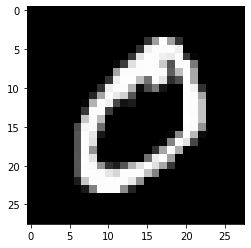

In [55]:
plt.imshow(img.numpy().reshape(28,28),'gray')
plt.show()

In [56]:
train_x = make_batch(train_data_path_1d)

In [57]:
train_x.shape, train_y_1d.shape

(TensorShape([60000, 28, 28, 1]), (60000,))

In [58]:
train_y = train_y_1d

### 학습하기

In [60]:
input_shape=(28,28,1)
num_classes=10
model = mymodel(input_shape, num_classes)

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
num_epoch = 1
batch_size= 32
hist = model.fit(train_x, train_y, batch_size= batch_size, shuffle=True, epochs=num_epoch)

1875/1875 [==============================] - 392s 209ms/step - loss: 0.1258 - accuracy: 0.9594


### 예측하기

In [71]:
test_img = train_x[20000]
test_img.shape

TensorShape([28, 28, 1])

In [72]:
test_img =test_img[tf.newaxis,...]

In [73]:
np.max(test_img), np.min(test_img), test_img.shape

(1.0, 0.0, TensorShape([1, 28, 28, 1]))

In [74]:
pred = model.predict(test_img)
pred

array([[1.0905489e-09, 4.4412527e-08, 1.2425808e-07, 9.9999285e-01,
        9.2686093e-08, 6.3577465e-07, 5.2296872e-10, 1.5643710e-07,
        4.0589970e-07, 5.8783930e-06]], dtype=float32)

In [76]:
pred, np.argmax(pred)

(array([[1.0905489e-09, 4.4412527e-08, 1.2425808e-07, 9.9999285e-01,
         9.2686093e-08, 6.3577465e-07, 5.2296872e-10, 1.5643710e-07,
         4.0589970e-07, 5.8783930e-06]], dtype=float32),
 3)

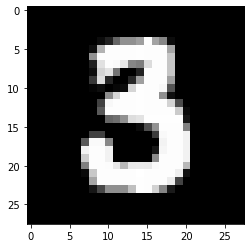

In [78]:
plt.imshow(test_img.numpy().reshape(28,28), 'gray')
plt.show()

### opencv 사용해보기

In [79]:
import cv2

In [80]:
img = cv2.imread('./images/tulips.jpg', cv2.IMREAD_COLOR) #주의 BGR 순서로 읽어들임

In [81]:
img.shape

(768, 1024, 3)

In [83]:
b,g,r= cv2.split(img)
b.shape

(768, 1024)

In [84]:
img_rgb= cv2.merge([r,g,b])

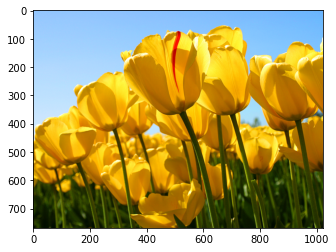

In [85]:
plt.imshow(img_rgb)
plt.show()